Nicklas Tasks 11-12

# Forberedelse af data til yderligere analyse

## 11. Undersøger funktionen 'residual sugar'. Indeholder den afvigere? På hvilke rækker i dataframen findes de? Fjern disse rækker.

In [287]:
import seaborn as sns

In [289]:
import matplotlib.pyplot as plt

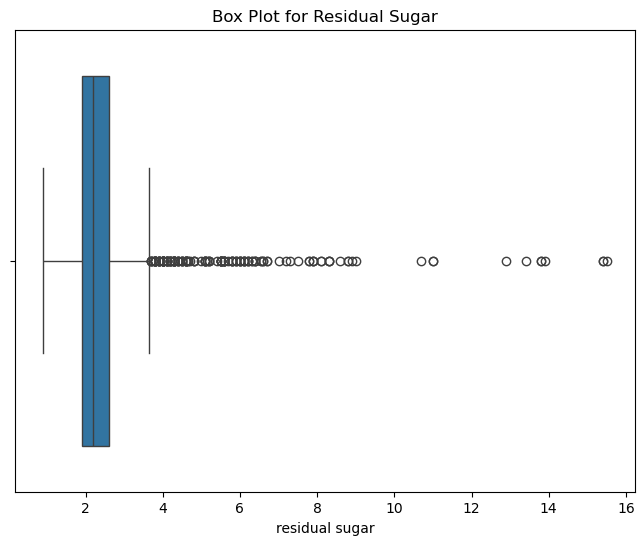

In [291]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=rødvin['residual sugar'])
plt.title('Box Plot for Residual Sugar')
plt.show()

##  JA, den indeholder afvigere

## På hvilke rækker i dataframen findes de?

## Beregning af grænser

In [4]:
Q1 = rødvin['residual sugar'].quantile(0.25)
Q3 = rødvin['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

NameError: name 'rødvin' is not defined

## Filtrér afvigere

In [466]:
outliers = rødvin[(rødvin['residual sugar'] < lower_bound) | (rødvin['residual sugar'] > upper_bound)]

## Dette vil liste indekserne for de rækker, der indeholder afvigere i 'residual sugar'.

### Får hele rækken for indekser

In [338]:
outlier_rows = outliers.index
print(f"Rows with outliers in 'residual sugar': {outlier_rows.tolist()}")

Rows with outliers in 'residual sugar': [9, 11, 14, 15, 18, 33, 35, 39, 40, 55, 57, 64, 65, 154, 155, 156, 157, 163, 164, 192, 215, 269, 270, 271, 272, 274, 275, 277, 278, 279, 283, 324, 325, 327, 353, 364, 366, 374, 375, 378, 395, 396, 400, 408, 409, 413, 415, 442, 455, 480, 484, 494, 501, 502, 510, 515, 516, 538, 539, 541, 554, 555, 556, 557, 558, 559, 564, 595, 606, 608, 624, 625, 645, 649, 652, 659, 690, 705, 719, 740, 800, 878, 884, 889, 903, 904, 910, 911, 913, 917, 923, 941, 944, 946, 974, 1032, 1038, 1043, 1056, 1057, 1059, 1071, 1074, 1077, 1078, 1079, 1081, 1086, 1094, 1096, 1114, 1133, 1138, 1147, 1176, 1186, 1190, 1203, 1226, 1235, 1239, 1244, 1257, 1276, 1288, 1289, 1295, 1296, 1307, 1331, 1358, 1373, 1388, 1394, 1406, 1412, 1423, 1434, 1435, 1437, 1441, 1445, 1471, 1474, 1476, 1478, 1501, 1514, 1515, 1540, 1552, 1558, 1574, 1577, 1589]


In [344]:
## 

## 12. Remove the attributes, which aren’t correlated with the wine quality, as well as the attributes that are highly correlated with another independent attribute.

# Fjern rækker med afvigere.

In [471]:
rødvin_cleaned = rødvin.drop(outliers.index)

print(rødvin_cleaned)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Visning af resultatet for det rensede datasæt

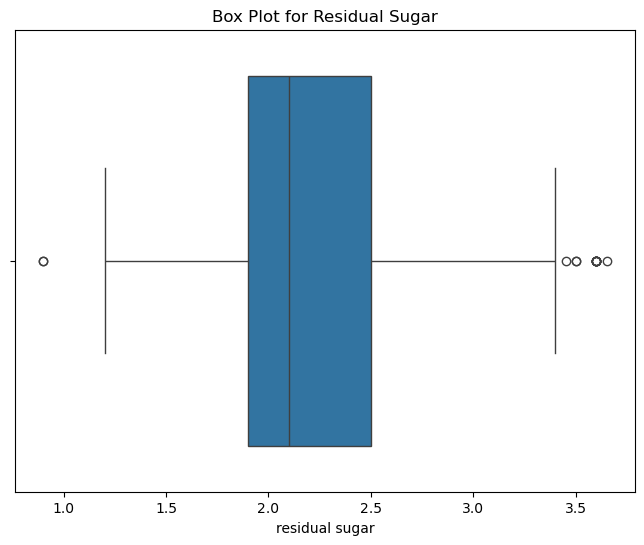

In [363]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=rødvin_cleaned['residual sugar'])
plt.title('Box Plot for Residual Sugar')
plt.show()

# 12. Fjern de attributter, der ikke er korrelerede med vinens kvalitet, samt de attributter, der er stærkt korrelerede med en anden uafhængig attribut.

# Identificér attributter, der ikke er korrelerede med vinens kvalitet.

## kriterium for at betragte korrelation som signifikant.

In [401]:
correlation_threshold = 0.3

# Filtrér attributter med signifikant korrelation med vinens kvalitet.

In [403]:
quality_correlation = correlation_matrix['quality'].abs()
relevant_attributes = quality_correlation[quality_correlation > correlation_threshold].index.tolist()

## Print resultat

In [405]:
print(f"Attributes correlated with wine quality: {relevant_attributes}")

Attributes correlated with wine quality: ['volatile acidity', 'alcohol', 'quality']


# Identificér attributter, der er stærkt korrelerede med andre attributter

## Kriterium for høj korrelation

In [482]:
high_correlation_threshold = 0.9

# Find attributpar med høj korrelation.

In [427]:
# Find attribute pairs with high correlation
highly_correlated_pairs = correlation_matrix.unstack().reset_index()
highly_correlated_pairs.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
highly_correlated_pairs = highly_correlated_pairs[
    (highly_correlated_pairs['Correlation'].abs() > high_correlation_threshold) &
    (highly_correlated_pairs['Attribute 1'] != highly_correlated_pairs['Attribute 2'])
]

# Bestem hvilke attributter der skal fjernes (behold kun én fra hvert par).

In [433]:
print(f"Highly correlated pairs:\n{highly_correlated_pairs}")

Highly correlated pairs:
Empty DataFrame
Columns: [Attribute 1, Attribute 2, Correlation]
Index: []


In [495]:
attributes_to_remove = set(highly_correlated_pairs['Attribute 1'])

## Fjern unødvendige attributter.

## Konverter det endelige sæt af attributter til en liste.

In [493]:
final_attributes = list(set(relevant_attributes) - attributes_to_remove)

## Filtrér dataframen ved hjælp af listen

In [498]:
rødvin_filtered = rødvin[final_attributes]

# Vis den filtrerede dataframetabel

In [456]:
print(rødvin_filtered)

      quality  volatile acidity  alcohol
0           5             0.700      9.4
1           5             0.880      9.8
2           5             0.760      9.8
3           6             0.280      9.8
4           5             0.700      9.4
...       ...               ...      ...
1594        5             0.600     10.5
1595        6             0.550     11.2
1596        6             0.510     11.0
1597        5             0.645     10.2
1598        6             0.310     11.0

[1599 rows x 3 columns]
